# Monte Carlo Simulation for Social Distancing to Prevent COVID-19 Infection

This notebook holds the analysis for the Monte Carlo Simulation.

In [29]:
# Dependencies

import pandas as pd
import numpy as np
import seaborn as sns

from grid import Grid

sns.set_style('whitegrid')


In [70]:
# Simulation setup

# Grid size
grid_height = 100
grid_width = 100

# Simulation parameters
population_size = 1000
infection_rate = 0.009
mobility = 0.75
p_death = 0.06
infection_duration = 10
max_evolutions = 1000

# Percentage of stationary population (per simulation)
stationary_percentages = np.arange(0, 1.2, 0.2).round(2).tolist()

# Simulation per stationary population
# TODO: Update this to 10000 for proper run
run_per_stat_percentage = 10


[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]


In [62]:
# Running simulation


# DataFrame creation

df = pd.DataFrame({
    "Stationary Percentage": [],
    "Death Rate": [],
    "Max Infection Rate": [],
    "Max Infection Rate Period": [],
    "Total Infection Rate": [],
    "Stop Period": []
})



for stat_percentage in stationary_percentages:
    
    death_rates = []
    max_infection_rates = []
    max_infection_rate_periods = []
    total_infection_rates = []
    stop_periods = []
    
    for _ in range(run_per_stat_percentage):
        
        last_evolution = 0
        
        max_infection_rate = 0
        max_infection_rate_period = 0
        
        last_dead_person_count = 0
        last_immune_person_count = 0
        last_infected_person_count = 0
        
        g = Grid(grid_height, grid_width, population_size, infection_rate,
                 stat_percentage, mobility, p_death, infection_duration)
                        
        for evolution in range(max_evolutions):

            if g.is_outbreak_stable():
                last_evolution = evolution
                break

            g.perform_evolution()
            
            current_snapshot = g.get_current_snapshot()
            
            current_dead_person_count = current_snapshot["dead_person_count"]
            current_immune_person_count = current_snapshot["immune_person_count"]
            current_infected_person_count = current_snapshot["infected_person_count"]
            
            current_infection_rate = (current_infected_person_count - last_infected_person_count)
            current_infection_rate += (current_immune_person_count - last_immune_person_count)
            current_infection_rate += (current_dead_person_count - last_dead_person_count)
            
            if (current_infection_rate > max_infection_rate):
                max_infection_rate = current_infection_rate
                max_infection_rate_period = evolution
            
            last_dead_person_count = current_dead_person_count
            last_immune_person_count = current_immune_person_count
            last_infected_person_count = current_infected_person_count

        
        final_snapshot = g.get_current_snapshot()
        
        final_dead_person_count = final_snapshot["dead_person_count"]
        final_immune_person_count = final_snapshot["immune_person_count"]
        final_infected_person_count = final_snapshot["infected_person_count"]
        
        total_infection_rate = final_dead_person_count + final_immune_person_count + final_infected_person_count
        
        death_rates.append(final_dead_person_count)

        max_infection_rates.append(max_infection_rate)
        max_infection_rate_periods.append(max_infection_rate_period + 1)
        total_infection_rates.append(total_infection_rate)
        
        stop_periods.append(last_evolution + 1)
                
        
    new_df = pd.DataFrame({
        "Stationary Percentage": np.repeat(stat_percentage, run_per_stat_percentage),
        "Death Rate": death_rates,
        "Max Infection Rate": max_infection_rates,
        "Max Infection Rate Period": max_infection_rate_periods,
        "Total Infection Rate": total_infection_rates,
        "Stop Period": stop_periods
    })

    df = df.append(new_df, ignore_index=True)

In [63]:
# Store the dataframe

# To read this, run df = pd.read_pickle(file_name)
df.to_pickle("simulation_df.pkl")

display(df)

,Stationary Percentage,Death Rate,Max Infection Rate,Max Infection Rate Period,Total Infection Rate,Stop Period
0,0.0,9.0,10.0,1.0,185.0,136.0
1,0.0,2.0,10.0,1.0,33.0,88.0
2,0.0,2.0,9.0,1.0,51.0,109.0
3,0.0,23.0,13.0,1.0,302.0,146.0
4,0.0,0.0,9.0,1.0,25.0,68.0
...,...,...,...,...,...,...
105,1.0,1.0,9.0,1.0,9.0,61.0
106,1.0,1.0,9.0,1.0,9.0,22.0
107,1.0,0.0,9.0,1.0,9.0,15.0
108,1.0,1.0,9.0,1.0,9.0,29.0


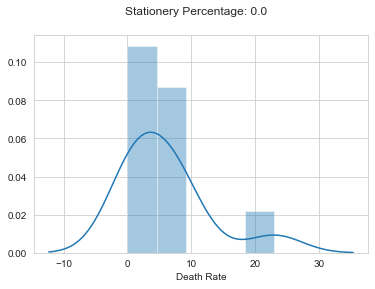

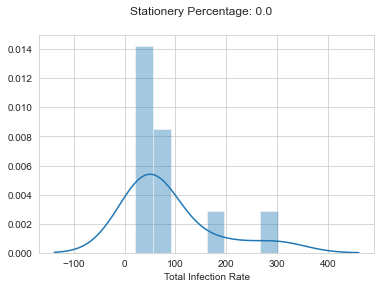

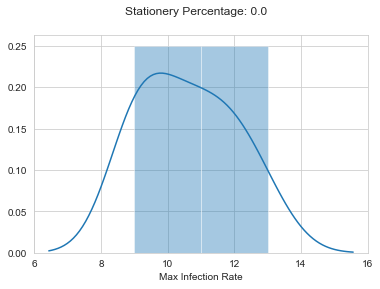

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


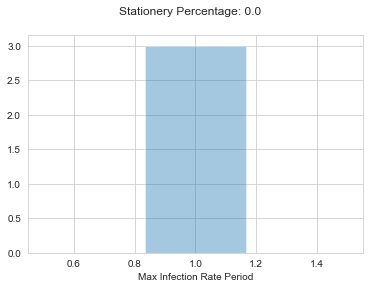

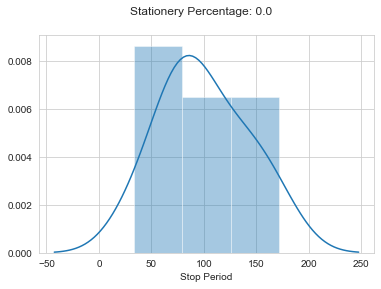

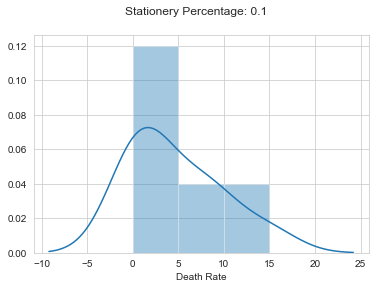

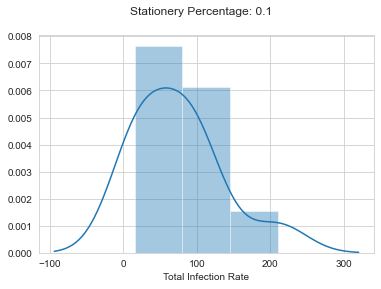

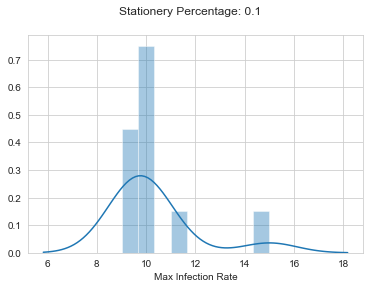

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


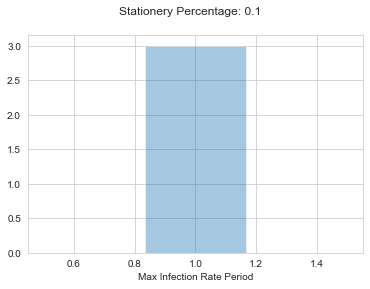

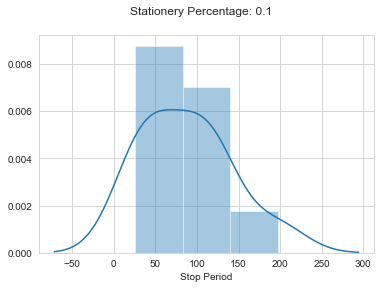

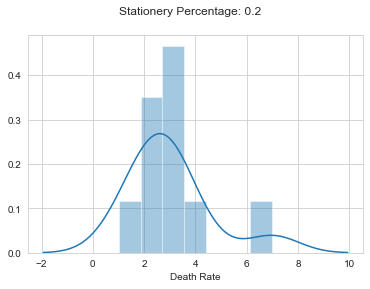

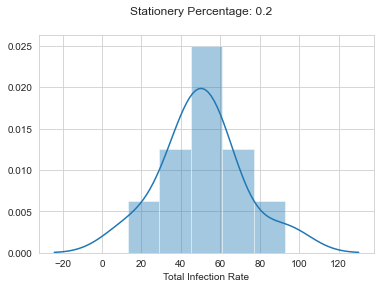

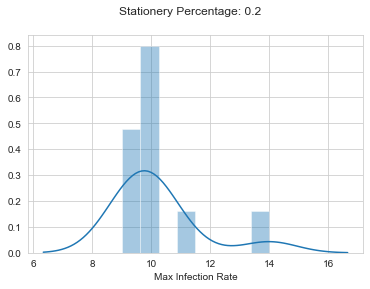

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


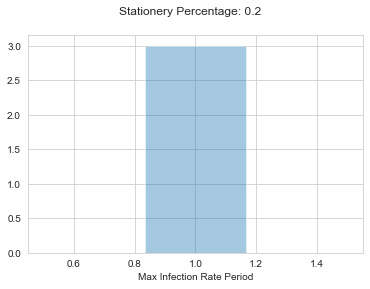

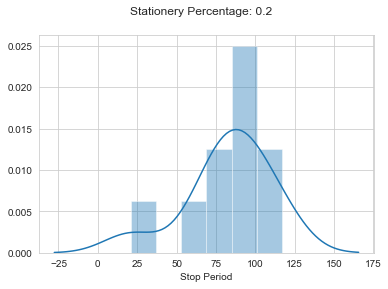

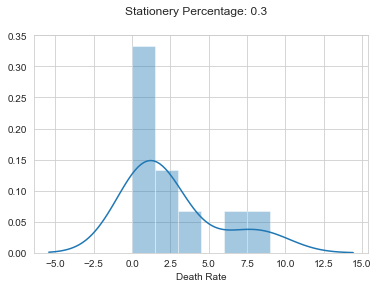

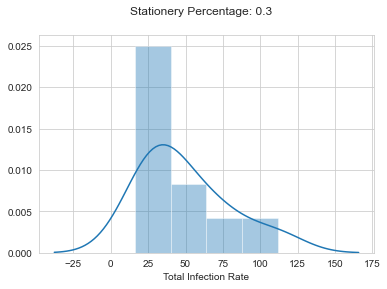

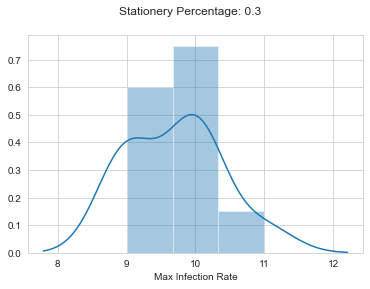

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


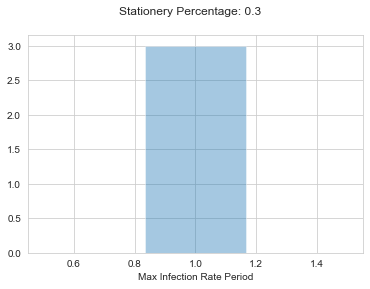

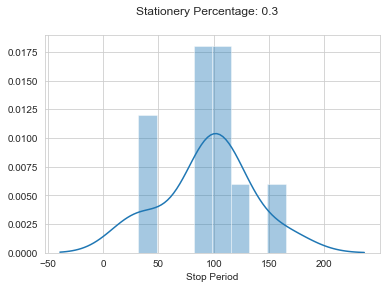

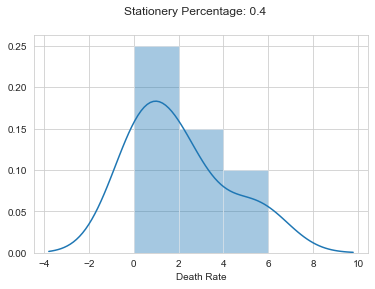

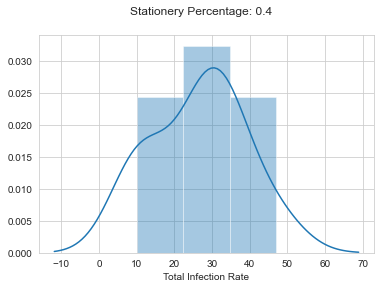

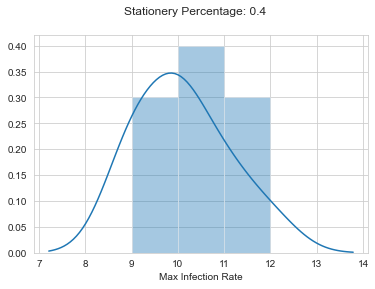

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


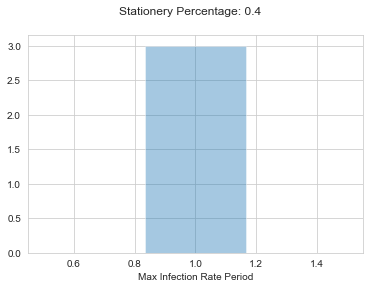

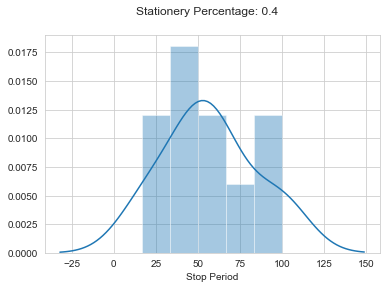

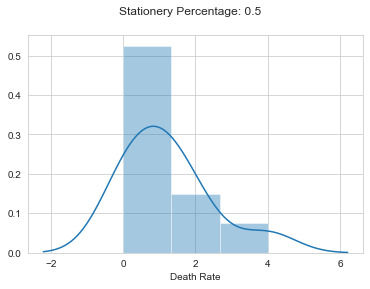

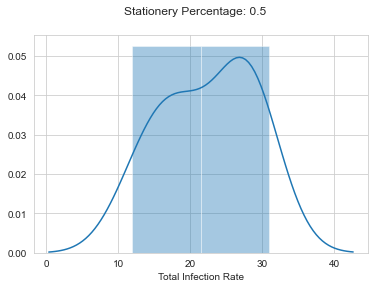

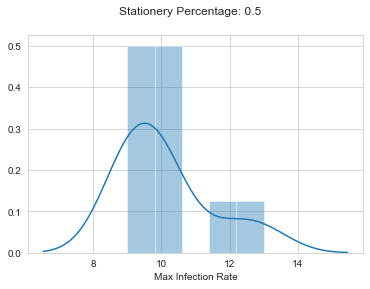

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


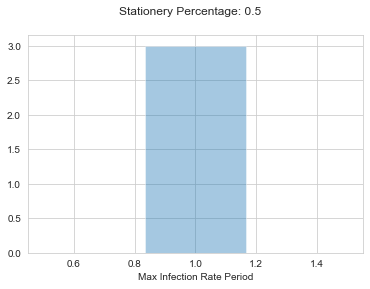

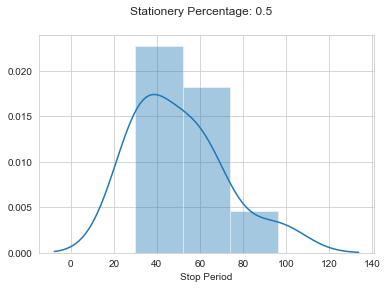

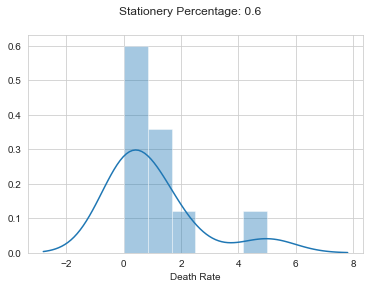

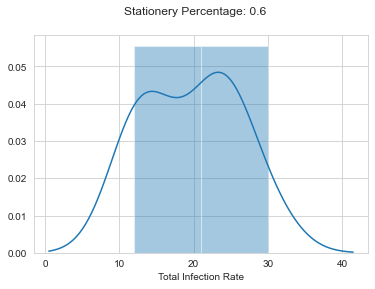

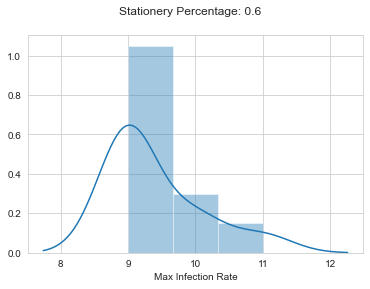

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


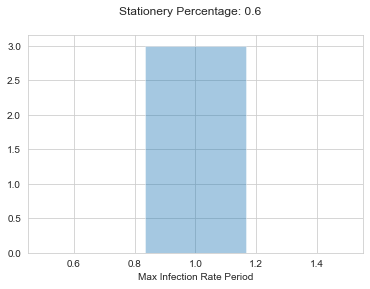

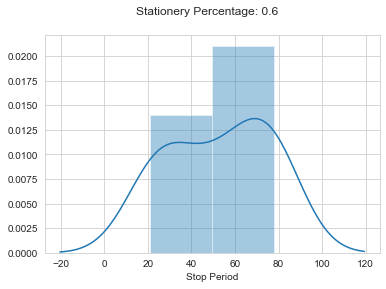

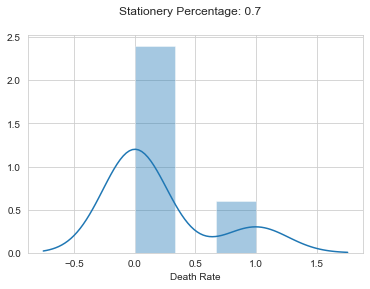

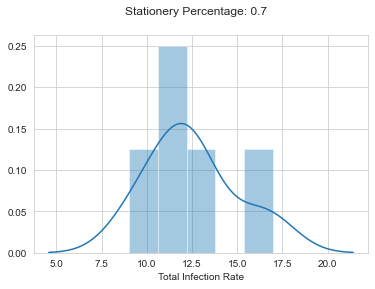

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


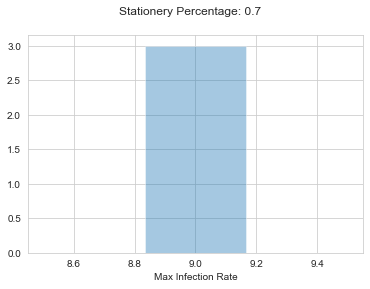

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


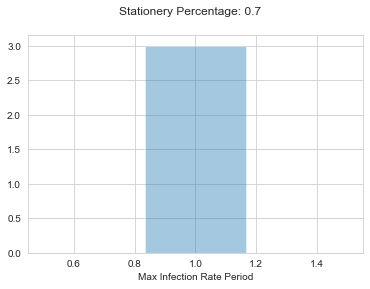

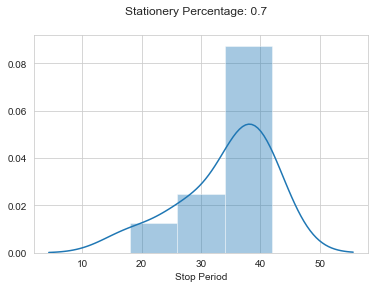

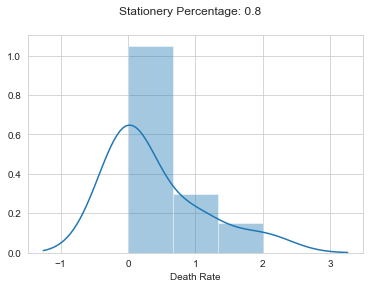

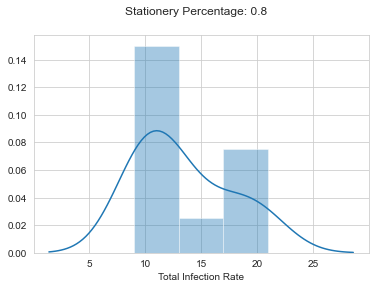

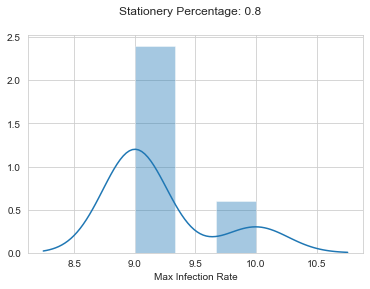

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


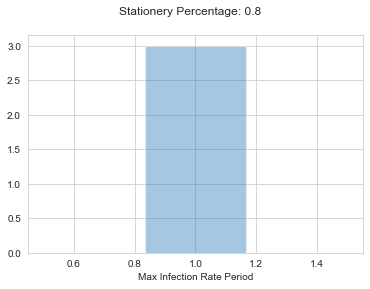

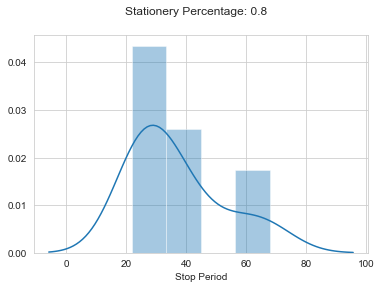

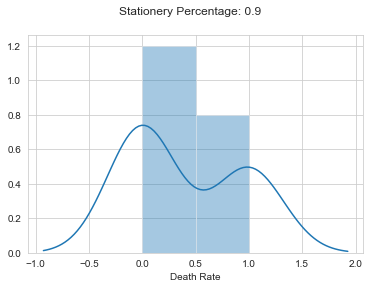

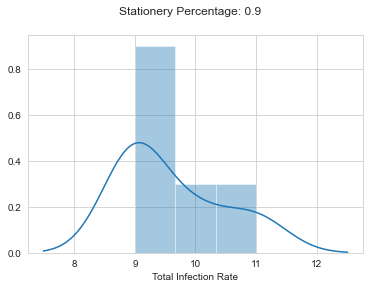

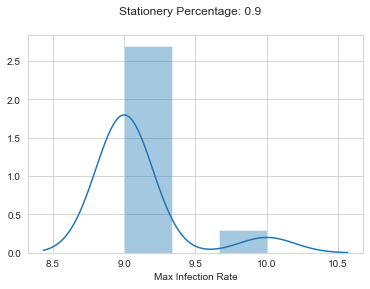

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


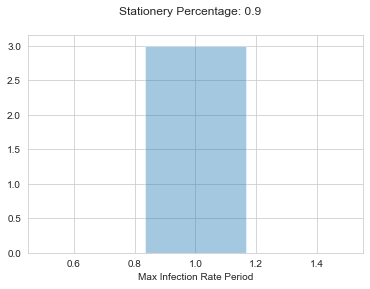

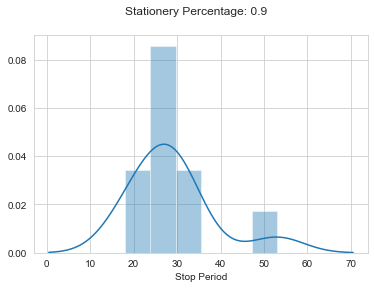

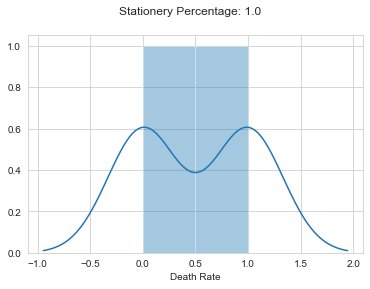

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


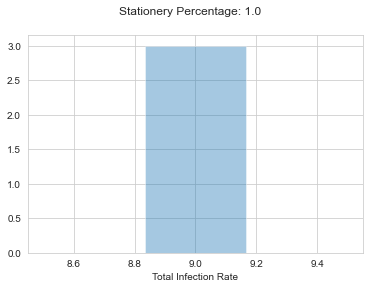

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


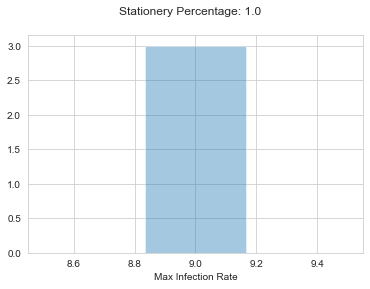

/Users/ricardopramanasuranta/Documents/Projects-CMUSV/Spring-2020/18657-DASE/jupyter-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


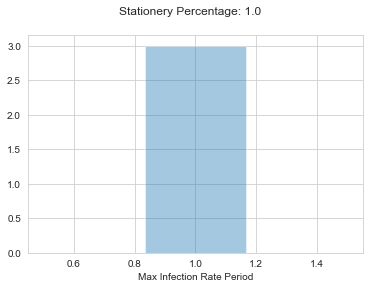

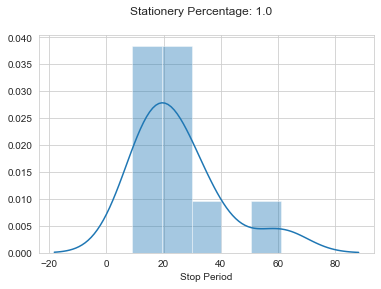

In [64]:
# Show histogram for the death rate, max infection rate, and total infection rate for each stationary percentage


import matplotlib.pyplot as plt

def show_histogram_plot(stat_percentage):
    
    stat_df = df.loc[df["Stationary Percentage"] == stat_percentage]
    
    show_category_histogram_plot(stat_percentage, stat_df, "Death Rate")
    show_category_histogram_plot(stat_percentage, stat_df, "Total Infection Rate")
    show_category_histogram_plot(stat_percentage, stat_df, "Max Infection Rate")
    show_category_histogram_plot(stat_percentage, stat_df, "Max Infection Rate Period")
    show_category_histogram_plot(stat_percentage, stat_df, "Stop Period")

    
def show_category_histogram_plot(stat_percentage, dataframe, category):
    
    sns.distplot(dataframe[category])
    plt.suptitle(f"Stationery Percentage: {stat_percentage}")
    plt.show()

    
for stat_percentage in stationary_percentages:
    
    show_histogram_plot(stat_percentage)
    

In [65]:
# Show graphs for each category against each stationary percentage

mean_df = df.groupby("Stationary Percentage").mean()

display(mean_df)

,Death Rate,Max Infection Rate,Max Infection Rate Period,Total Infection Rate,Stop Period
Stationary Percentage,,,,,
0.0,5.9,10.6,1.0,88.0,99.6
0.1,4.7,10.3,1.0,73.9,87.2
0.2,3.0,10.2,1.0,50.6,83.0
0.3,2.6,9.7,1.0,49.4,94.6
0.4,2.0,10.1,1.0,26.4,57.0
0.5,1.2,10.1,1.0,22.4,50.2
0.6,1.0,9.4,1.0,19.7,52.6
0.7,0.2,9.0,1.0,12.5,34.3
0.8,0.4,9.2,1.0,13.4,36.7


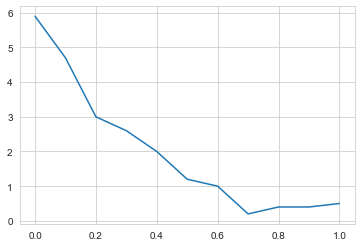

In [66]:
# Plot for Death Rate

sns.lineplot(data=mean_df["Death Rate"])

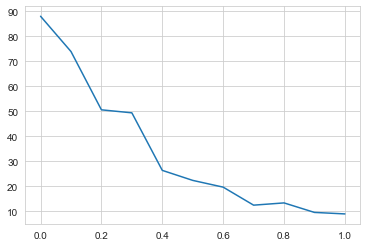

In [67]:
# Plot for Total Infection Rate

sns.lineplot(data=mean_df["Total Infection Rate"])

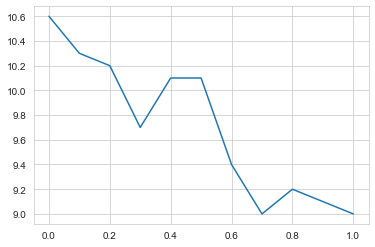

In [68]:
# Plot for Max Infection Rate
sns.lineplot(data=mean_df["Max Infection Rate"])

In [ ]:
# Plot for Max Infection Rate Period
sns.lineplot(data=mean_df["Max Infection Rate Period"])

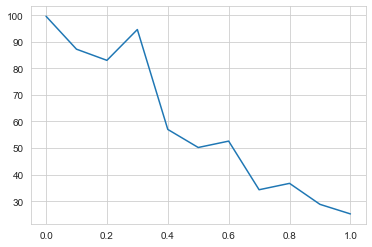

In [69]:
# Plot for Average Stop Period
sns.lineplot(data=mean_df["Stop Period"])